# Exercize 1: Gaussian distributions

Using the technique introduced above, we would like to plot a normal Gaussian probability distribution
with mean vector $\mu = (0, 0)$ and covariance matrix $\Sigma =I$ also known as standard normal distribution.
We consider the same discretization as above, (i.e. a grid from -4 to 4 using step size 0.1). 
For two dimensional input spaces, the standard normal distribution is given by 
$$
p(x, y) =\frac{1}{2\pi}\exp^{-0.5(x^2+y^2)}.
$$
This distributionsums to 1 when interated over $\mathbb{R}^2$. However, it does not sum to 1 when summing over the discretized space (i.e. the grid). Instead, we can work with a discretized Gaussian-like distribution:
$$P(x, y) = \frac{1}{Z}\exp^{-0.5(x^2+y^2)}, \text{with } Z = \sum_{x, y}\exp^{-0.5(x^2+y^2)}$$
where the sum runs over the whole discretized space.

- Compute the distribution $P(x, y)$, and plot it.
- Compute the conditional distribution $Q(x, y) = P\left(\left.(x,y)\right|\sqrt{x^2+y^2}\ge 1\right)$, and plot it.
- Marginalize the conditioned distribution $Q(x, y)$ over $y$, and plot the resulting distribution $Q(x). 


## Compute the distribution $P(x, y)$, and plot it.

In [12]:
import math
import numpy
import matplotlib
#%matplotlib inline
get_ipython().magic('matplotlib inline')

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

R = numpy.arange(-4,4+1e-9,0.1)
x,y = numpy.meshgrid(R,R)



# Define the probability function (discrete)

# In[11]:

z = sum(sum(math.e**(-0.5*(x**2+y**2))))
F = 1/z*math.e**(-0.5*(x**2+y**2))
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,F,s=1,alpha=0.5)


def P_raw(x, y):
    return( numpy.exp(-0.5 * (x**2 + y**2))) 


In [2]:
R        = numpy.arange(-4, 4+1e-9,0.1)
X, Y     = numpy.meshgrid(R, R)
rawProbs = P_raw(X,Y)
numpy.sum(rawProbs)

628.25463268301951

In [3]:
def P(x, y):
    return( numpy.exp(-0.5 * (x**2 + y**2))/628.25463268301951) 

# Testing whether we get the right  normalization
numpy.sum(P(X,Y))


1.0

## Compute the distribution $P(x, y)$, and plot it.

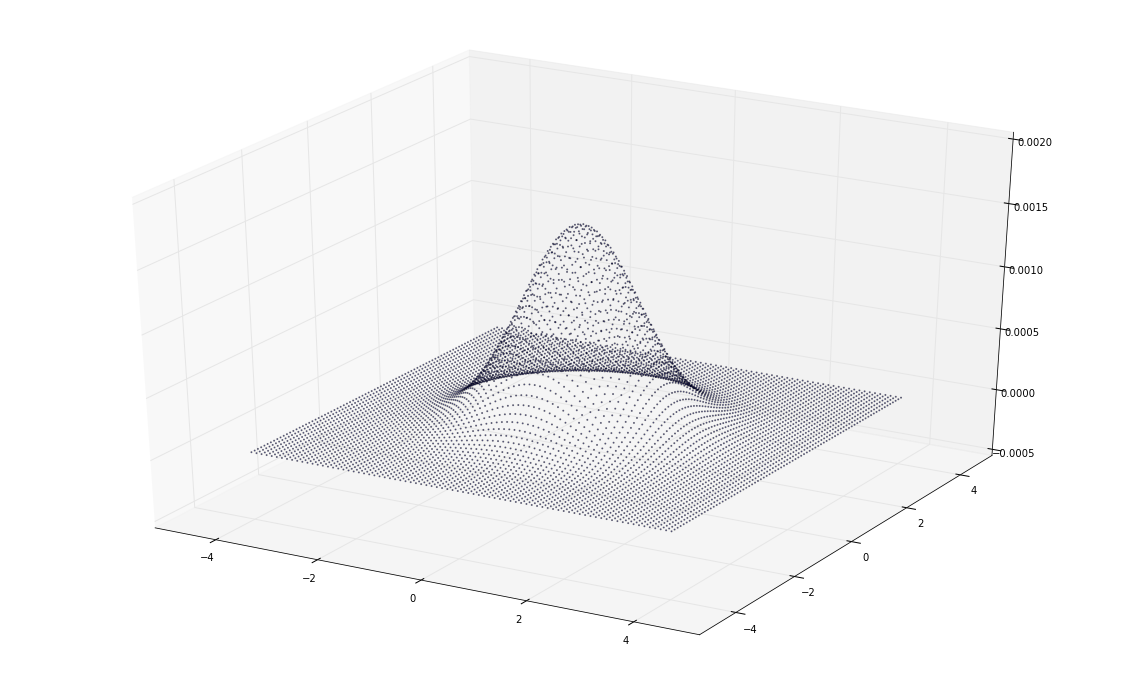

In [13]:
fig1 = plt.figure(figsize = (20, 12))
ax = plt.axes(projection = '3d')
ax.scatter(X, Y, P(X, Y), s=1, alpha = 0.5)

## Compute the conditional distribution $Q(x, y) = P\left(\left.(x,y)\right|\sqrt{x^2+y^2}\ge 1\right)$, and plot it.


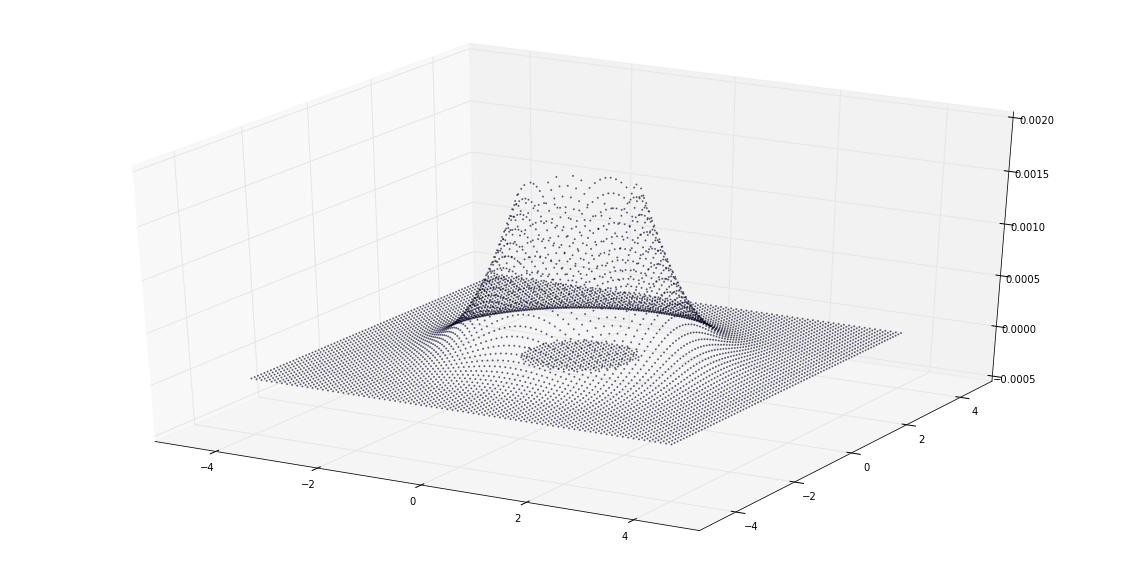

In [17]:
# Q2: conditional distribution

# In[15]:

z = sum(sum(math.e**(-0.5*(X**2+Y**2))))
F = 1/z*math.e**(-0.5*(X**2+Y**2))
Fcon = F*((X**2+Y**2)**0.5>=1)
Fcon1 = Fcon/Fcon.sum()
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,Fcon1,s=1,alpha=0.5)

In [14]:
def Q(x, y):
    P(x,y[x**2+y**2>1])
    
print(Q(3,5))

TypeError: 'int' object is not subscriptable

<class 'numpy.ndarray'>


NameError: name 'F' is not defined

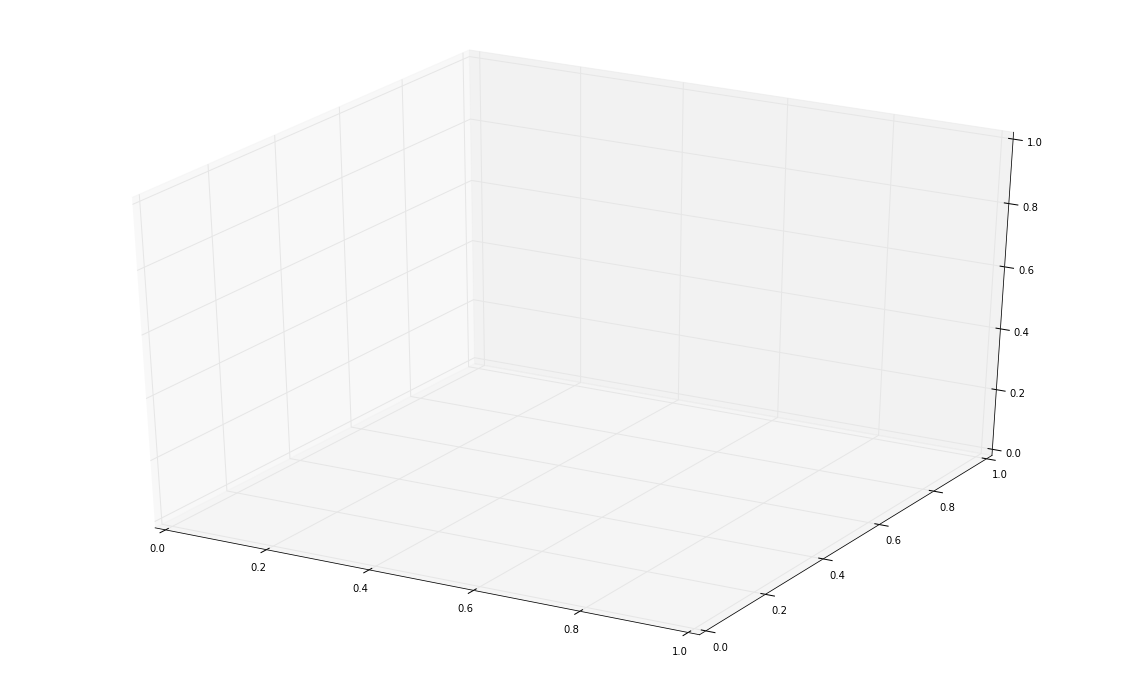

In [6]:
fig2 = plt.figure(figsize = (20, 12))
ax = plt.axes(projection = '3d')
# F = numpy.ndarray(map(Q, X, Y))
print(type(X))
print(type(F))

In [ ]:
import numpy as np
# ndarray attributes

a = np.array([2, 3, 4])
b = np.zeros((2, 3))
c = np.ones((2, 3, 4))
d = np.empty((2, 4))
e = np.arange( 10, 30, 5 )
# np.arange( from , to, by )
f = np.linspace( 0, 2, 9 )   
# np.linspace( from, to, numElements )   

print(X.ndim)
print(X.shape)
print(X.size)
print(X.dtype)
print(X.itemsize)
print(X.data)

In [ ]:
# ax.scatter(X, Y, F , s=1, alpha = 0.5)        

In [ ]:
type(map(math.sin, X))



In [ ]:
type(X)

In [11]:
[X**2+Y**2>1]

[array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ..., 
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)]

# Exercise 2: Bayesian Classification (5+5+5 P)

Let the two coordinates $x $ and $y $ be now representated as a two-dimensional vector ${\bf X}$. 
We consider two classes $\omega_1$ and $\omega_2$ with data-generating Gaussian distributions 
$p(x|\omega_1)$ and $p(x|\omega_2)$ of mean vectors $\mu_1 = (−0.5, −0.5)$ and $\mu_2 = (0.5, 0.5)$
respectively, and same covariance matrix

$$ 
\Sigma = 
\begin{pmatrix} 
1.0 & 0 \\ 0 & 0.5 
\end{pmatrix}.
$$

Classes occur with probability $P(\omega_1) = 0.9$ and $P(\omega_2) = 0.1$. Analysis tells us that 
in such scenario, the optimal decision boundary between the two classes should be linear. We would 
like to verify this computationally by applying Bayes decision theory on grid-like discretized distributions.

- ** Using the same grid as in Exercise 1, discretize the two data-generating distributions $p(\left. x\right|\omega_1)$ 
and $p(\left. x\right|\omega_2)$ (i.e. create discrete distributions $P(\left. x\right|\omega_1)$ and $P(\left. x\right|\omega_2)$ on the grid), 
and plot them with different colors.**
- From these distributions, compute the total probability distribution 
$P(x) = \sum_{c\in(1, 2)}\sum_{x=1} P(\left. x \right|\omega_c)\cdot P(\omega_c)$, and plot it.
- Compute and plot the class posterior probabilities 
$P(\left. \omega_1\right|x)$ and 
$P(\left. \omega_2\right|x)$, and print the Bayes error rate for the discretized case.

$$
x\in R
$$

In [ ]:





# Q3: Marginal distribution

# In[ ]:




# In[ ]:




# In[ ]:



# Exercise 3: Reducing the Variance (5+5 P)

Suppose that the data generating distribution for the second class changes to produce samples much closer to
the mean. This variance reduction for the second class is implemented by keeping the first covariance the same
(i.e. Σ1 = Σ) and dividing the second covariance matrix by 4 (i.e. Σ2 = Σ/4). For this new set of parameters,
we can perform the same analysis as in Exercise 2.

- Plot the new class posterior probabilities P(ω1|x) and P(ω2|x) associated to the new covariance
matrices, and print the new Bayes error rate

In [ ]:
Intuition tells us that by variance reduction and resulting concentration of generated data for class 2 in a
smaller region of the input space, it should be easier to predict class 2 with certainty at this location. Paradoxally,
in this new “dense” setting, we observe that class 2 does not reach full certainty anywhere in the input space,
whereas it did in the previous exercise.
• Explain this paradox.

In [ ]:
print(list(zip(X.flatten(),Y.flatten())))
print(X.shape, Y.shape)
def L2(x, y):
    return (x**2 + y**2)**.5

F = L2(X,Y)

fig = plt.figure(figsize = (10, 6))
ax = plt.axes(projection = '3d')
ax.scatter(X, Y, F, s=1, alpha = 0.5)